<a href="https://colab.research.google.com/github/Muskan-Malhotra/Machine-Learning/blob/main/Copy_of_EDA_for_CC_defauters(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

df One has seen an increase in the number of customers who have defaulted on loans they have secured from various partners, and df One, as their df scoring service, could risk losing business if the problem is not solved right away. In this df_payification task  “df_pay” is the dependent variable. 

For this task below is the problem statement and investigative question that needs to be addressed:

**Problem:**
1.	Increase in customer default rates - This is bad for df One since we approve the customers for loans in the first place.
2.	Revenue and customer loss for clients and, eventually, loss of clients for dfOne

**Investigative Question:**
1.	How do you ensure that customers can/will pay their loans? Can we do this?
2.	Can we approve customers with high certainty?


In [ ]:
# Importing Libraraies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#mounting google drive to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing File
df = pd.read_excel('/content/drive/MyDrive/Projects/default_of_credit_card_clients_0.xlsx') 

**Understanding Data**

Case of customers default payments in Taiwan. Data collected from April to September, 2005)

**Variables in Data (Total 23 variables)**
1. Binary Response variable, default payment (Yes = 1, No = 0)
2. LIMIT_BAL: Amount of the given df (NT dollarGender (1 = male; 2 = female).
3. Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).
4. Marital status (1 = married; 2 = single; 3 = divorce; 0=others).
5. Age (year).


Imbalance in the df_pay – Dataset   shows that 6636 out of 30000 customers will default next month. 
Dataset is highly imbalanced.


In [ ]:
# Checking data
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,df_one
0,1,20000,2,2,1,24,1
1,2,120000,2,2,2,26,1
2,3,90000,2,2,2,34,0
3,4,50000,2,2,1,37,0
4,5,50000,1,2,1,57,0


In [ ]:
# Column names
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'df_one'], dtype='object')

In [ ]:
# Understand the makeup of the data
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,df_one
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,1.000000


In [ ]:
# Checking the data types of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   default payment next month  30000 non-null  int64
dtypes: int64(7)
memory usage: 1.6 MB


#Pre-Processing
### 1) Checking for missing data

In [ ]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
df_one       0
dtype: int64

#####There are no missing values in df credit_card dataset

In [ ]:
# Dropping ID column
df.drop('ID', axis = 1, inplace =True) 
df.columns # Confirming removal of ID column

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'df_one'], dtype='object')

###  Removing ID column

###  Grouping Eduction Categories

In [ ]:
# Checking Education variable unique levels
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [ ]:
# Grouping "others" and "unindentified" levels 
df['EDUCATION']=np.where(df['EDUCATION'] == 5, 4, df['EDUCATION'])
df['EDUCATION']=np.where(df['EDUCATION'] == 6, 4, df['EDUCATION'])
df['EDUCATION']=np.where(df['EDUCATION'] == 0, 4, df['EDUCATION'])

In [ ]:
# Confirming grouping 
df['EDUCATION'].unique()

array([2, 1, 3, 4])

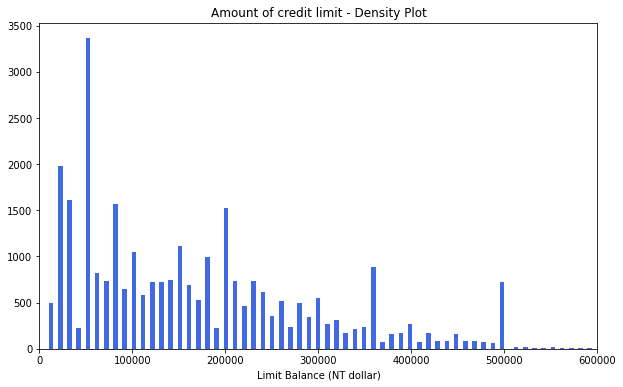

<Figure size 432x288 with 0 Axes>

In [ ]:
# Frequencey distribution of amount of credit limit
plt.figure(figsize = (10,6))
plt.title('Amount of credit limit - Density Plot')
plt.xlim([0,600000])
plt.xlabel('Limit Balance (NT dollar)')
plt.hist(df['LIMIT_BAL'], bins=200, color=['royalblue'])
plt.show()
plt.savefig('Amount of credit limit.png', dpi=200, transparent=True)

**$50000 is the credit limit common for larget number of people.**




### 2) Frequency distribution of Age


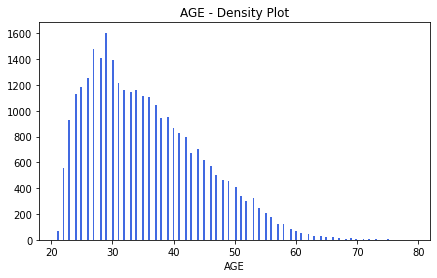

In [ ]:
# Frequency distribution of age whole dataset
plt.figure(figsize = (7,4))
plt.title('AGE - Density Plot')
plt.xlabel('AGE')
plt.hist(df['AGE'], bins=200, color=['royalblue'])
plt.show()

**Higher density of people found in age group 25 to 40. With highest density** 


### 3) Gender




In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default payment next month
0,20000,2,2,1,24,1
1,120000,2,2,2,26,1
2,90000,2,2,2,34,0
3,50000,2,2,1,37,0
4,50000,1,2,1,57,0


In [ ]:
# Male vs. female counts
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

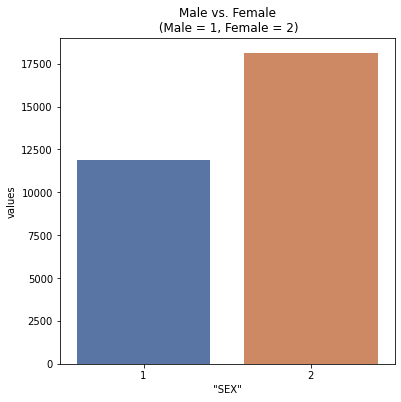

In [ ]:
# Male vs. female count 
temp = df["SEX"].value_counts()
df_2 = (pd.DataFrame({'"SEX"': temp.index,'values': temp.values}))
plt.figure(figsize = (6,6))
plt.title('Male vs. Female\n (Male = 1, Female = 2)')
sns.set_color_codes("pastel")
sns.barplot(x = '"SEX"', y="values", data=df_2, palette="deep")
locs, labels = plt.xticks()
plt.show()

**Higher proportion of female as compared to males.**


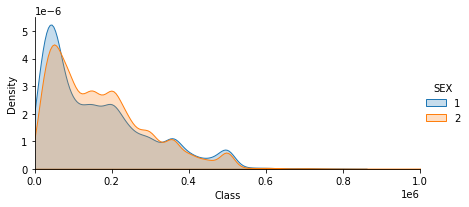

In [ ]:
# Balance limit based on Gender
fig = sns.FacetGrid(df, hue='SEX', aspect = 2)
fig.map(sns.kdeplot, 'LIMIT_BAL', shade = True)
oldest = df['LIMIT_BAL'].max()
fig.set(xlim=(0,oldest))
plt.xlabel('Class')
fig.add_legend()
plt.show()
fig.savefig('limit_Bal_sesx.jpg', dpi=200, transparent=True);


**Higher proportion of males with lower credit limit balance.**

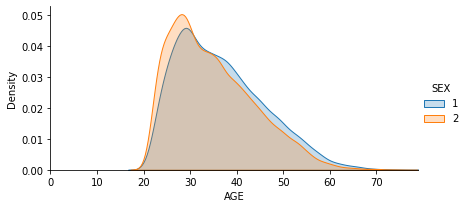

In [ ]:
# Age distribution based on Gender 
fig = sns.FacetGrid(df, hue='SEX', aspect = 2)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = df['AGE'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.show()
fig.savefig("SEX_COUNT_kde.jpg",bbox_inches = "tight")


**Higher proportion of females in age range 20 to 40.**

In [ ]:
# Total count in each eduacation level
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

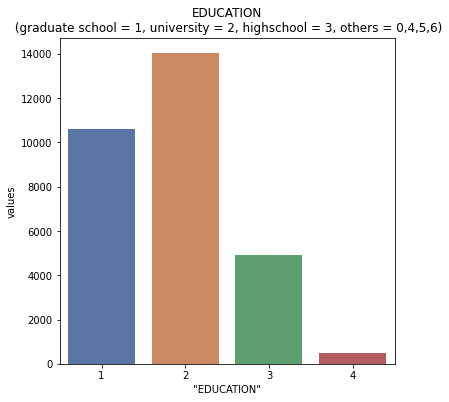

<Figure size 432x288 with 0 Axes>

In [ ]:
# Distribution of people by education level
temp = df["EDUCATION"].value_counts()
df_3 = (pd.DataFrame({'"EDUCATION"': temp.index,'values': temp.values}))
plt.figure(figsize = (6,6))
plt.title('EDUCATION\n (graduate school = 1, university = 2, highschool = 3, others = 0,4,5,6)')
sns.set_color_codes("pastel")
sns.barplot(x = '"EDUCATION"', y="values", data=df_3 , palette="deep")
locs, labels = plt.xticks()
plt.show()
plt.savefig("education effect.jpg",bbox_inches = "tight")

**Highest proportion of people with university and graduate school education**

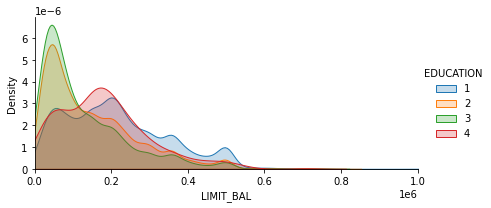

In [ ]:
# Balance limit based on Education Level
fig = sns.FacetGrid(df, hue='EDUCATION', aspect = 2)
fig.map(sns.kdeplot, 'LIMIT_BAL', shade = True)
oldest = df['LIMIT_BAL'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.show()
fig.savefig("education_effect456.jpg",bbox_inches = "tight")

**Higher proportion of non-defaulters and defaulters with university and graduate level education.**

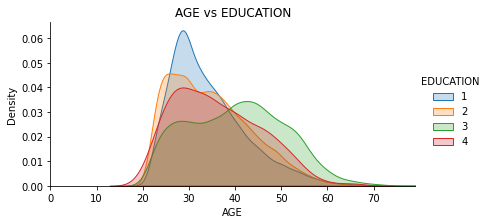

<Figure size 432x288 with 0 Axes>

In [ ]:
# Age distribution based on Education
fig = sns.FacetGrid(df, hue='EDUCATION', aspect = 2)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = df['AGE'].max()
fig.set(xlim=(0,oldest))
plt.title("AGE vs EDUCATION")
fig.add_legend()
plt.show()
fig.savefig("AGE_EDUCATION.jpg",bbox_inches = "tight")
plt.savefig("education effect.jpg",bbox_inches = "tight")

**Higher proportion of people with graduate and university level in age group 20 to 40. While high school and other levels show lower proportion.**

### 4) Marital Status

In [ ]:
# Total count in each marital status
df['MARRIAGE'].value_counts(dropna=False)

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

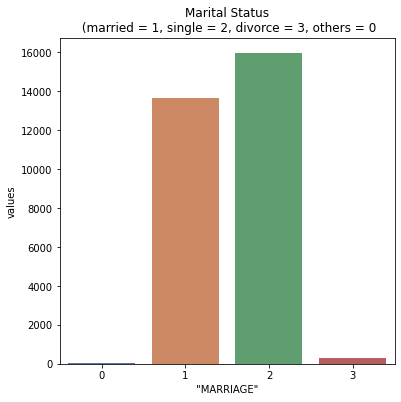

In [ ]:
# Distribution of people by marital status level
temp = df["MARRIAGE"].value_counts()
df_4 = (pd.DataFrame({'"MARRIAGE"': temp.index,'values': temp.values}))
plt.figure(figsize = (6,6))
plt.title('Marital Status\n (married = 1, single = 2, divorce = 3, others = 0')
sns.set_color_codes("pastel")
sns.barplot(x = '"MARRIAGE"', y="values", data=df_4 , palette="deep")
locs, labels = plt.xticks()
plt.show()

**Higher proportion of people either married or single. Further proportion of 
singles is more than married**


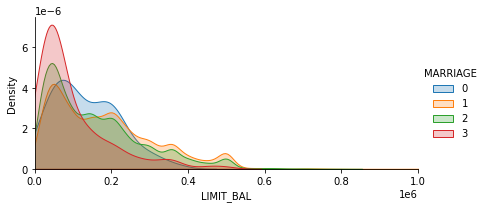

In [ ]:
# Balance limit based on Marital Status
fig = sns.FacetGrid(df, hue='MARRIAGE', aspect = 2)
fig.map(sns.kdeplot, 'LIMIT_BAL', shade = True)
oldest = df['LIMIT_BAL'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.show()
fig.savefig("marraige_effect456.jpg",bbox_inches = "tight")

**Higher proportion of people with divorced marital status show lower df limit. While other statues show similar proportion.**

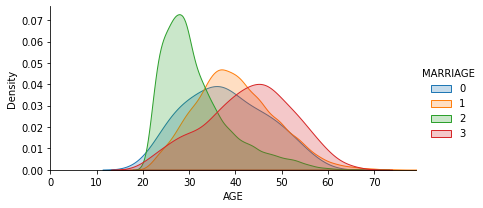

<Figure size 432x288 with 0 Axes>

In [ ]:
# Age distribution based on Marital Status 
fig = sns.FacetGrid(df, hue = 'MARRIAGE', aspect = 2)
fig.map(sns.kdeplot, 'AGE', shade = True)
oldest = df['AGE'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.show()
plt.savefig("education effect.jpg",bbox_inches = "tight")

**Highest proportion of singles in age group 20 to 40.**

## Conclusions from EDA:

1.	Potential defaulters show higher frequency of lower limit of amount of df limit.
2.	Non –defaulters show higher proportion in 25 to 40 years of age group.
3.	Non-defaulters have high proportion of females.
4.	Non-defaulters - singles and married in higher proportion.
5.	Non-defaulters have higher level of education (1 – graduate or 2 – university)
6.	People who had history of paying previous payments ahead of time are less likely to default next month.  